In [3]:
from qiskit import QuantumCircuit
import numpy as np
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

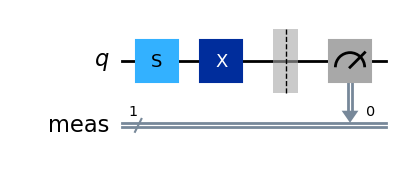

In [31]:
qc = QuantumCircuit(1) # Create a quantum circuit with 0 qubits
shots = 1024 # Number of shots for the simulation
qc.s(0) # Apply the S gate to qubit 0
qc.x(0) # Apply the Hadamard gate to qubit 0
qc.measure_all() # Measure all qubits
qc.draw('mpl') # Show the circuit diagram

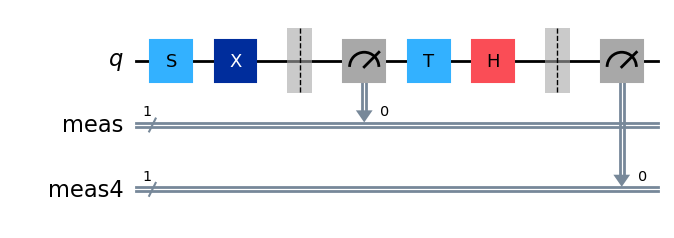

In [32]:
qc.t(0) # Apply the T gate to qubit 0
qc.h(0) # Apply the Hadamard gate to qubit 0
qc.measure_all() # Measure all qubits
qc.draw('mpl') # Show the circuit diagram

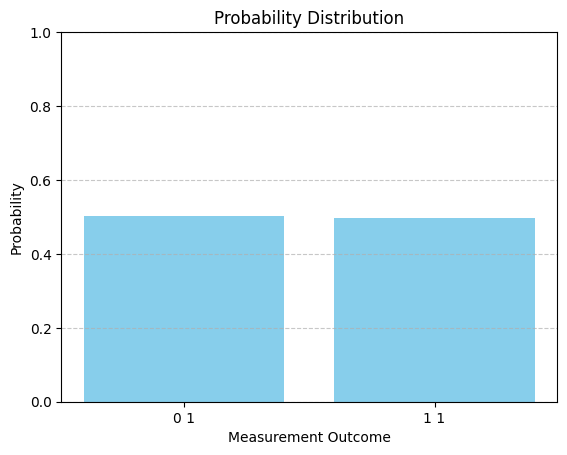

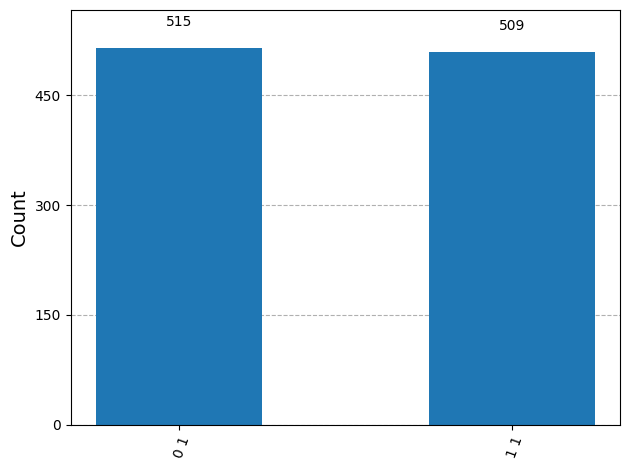

In [34]:
backend = Aer.get_backend('qasm_simulator')  # Use the Aer simulator backend
# Run the circuit on the simulator
job = backend.run(qc, shots=shots)
job_result = job.result()
# Get the counts
counts = job_result.get_counts()

# Convert counts to probabilities
probabilities = {state: count / shots for state, count in counts.items()}

# Plot the probability distribution
plt.bar(probabilities.keys(), probabilities.values(), color='skyblue')
plt.xlabel('Measurement Outcome')
plt.ylabel('Probability')
plt.title('Probability Distribution')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
# Plot the histogram of counts
plot_histogram(counts)